<a href="https://colab.research.google.com/github/hamednasr/deep-learning/blob/main/My_code%2C_minibatchsize_in_wine_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [159]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader , TensorDataset

import numpy as np
import pandas as pd
import scipy.stats as st

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# import data

In [160]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [161]:
wine = pd.read_csv(url,sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [162]:
data = wine.iloc[:,:11]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [163]:
labels = wine.iloc[:,-1]
labels

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [164]:
data_norm = st.zscore(data)

In [165]:
dataT = torch.FloatTensor(data_norm)
labelsT = torch.tensor(labels).long()-3

In [166]:
dataT

tensor([[-0.5284,  0.9619, -1.3915,  ...,  1.2886, -0.5792, -0.9602],
        [-0.2985,  1.9674, -1.3915,  ..., -0.7199,  0.1290, -0.5848],
        [-0.2985,  1.2971, -1.1861,  ..., -0.3312, -0.0481, -0.5848],
        ...,
        [-1.1603, -0.0996, -0.7239,  ...,  0.7055,  0.5420,  0.5416],
        [-1.3902,  0.6546, -0.7753,  ...,  1.6774,  0.3060, -0.2093],
        [-1.3327, -1.2168,  1.0220,  ...,  0.5111,  0.0109,  0.5416]])

In [167]:
dataT.shape

torch.Size([1599, 11])

In [168]:
labelsT.unique()

tensor([0, 1, 2, 3, 4, 5])

In [169]:
data_train, data_test, labels_train, labels_test = train_test_split(dataT, labelsT, test_size=0.1)

In [170]:
train_set = TensorDataset(data_train,labels_train)
test_set = TensorDataset(data_test,labels_test)

In [196]:
train_loader = DataLoader(train_set,batch_size=512,drop_last=True,shuffle=True)
test_loader = DataLoader(test_set,batch_size=test_set.tensors[1].shape[0])

In [197]:
for X, y in train_loader:
  print(X.shape,y)
  break

torch.Size([512, 11]) tensor([2, 4, 2, 2, 2, 2, 2, 4, 1, 4, 2, 3, 3, 2, 3, 2, 2, 2, 2, 4, 3, 4, 2, 4,
        3, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 4, 2, 2, 3, 2, 0, 4, 3, 3, 3,
        2, 1, 4, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
        2, 3, 4, 3, 3, 3, 1, 2, 3, 4, 2, 4, 4, 4, 3, 3, 2, 3, 4, 3, 3, 2, 2, 4,
        2, 4, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 1, 3, 2, 2, 4, 3, 4, 3,
        3, 3, 3, 2, 2, 2, 2, 3, 3, 4, 2, 3, 3, 2, 2, 2, 2, 4, 2, 3, 1, 2, 4, 2,
        3, 2, 2, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 4, 1, 3, 2, 2,
        4, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 4, 3, 2, 4, 3, 3, 5, 3, 3, 2, 3, 3,
        2, 4, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3,
        2, 2, 3, 4, 2, 3, 2, 3, 4, 3, 2, 4, 3, 2, 3, 2, 2, 3, 4, 0, 3, 3, 4, 3,
        2, 4, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 4, 3, 2, 3, 3, 4, 4, 3, 3,
        4, 4, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 2, 5, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2,
        3, 2, 2, 2

# create model 

In [198]:
class ANNnet(nn.Module):

  def __init__(self):
    super().__init__()

    self.input = nn.Linear(11,128)
    self.fc1 = nn.Linear(128,256)
    self.fc2 = nn.Linear(256,256)
    self.output = nn.Linear(256,6)


  def forward(self,x):

    x = F.relu(self.input(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.output(x)

    return x


## sanity check the model

In [199]:
net = ANNnet()
x = torch.randn((10,11))
y = net(x)
print(torch.argmax(y,axis=1))

tensor([5, 1, 5, 5, 5, 5, 1, 1, 5, 5])


# train the model

In [241]:
epochs = 100

def trainANN():

  net = ANNnet()
  optimizer = torch.optim.SGD(params = net.parameters(), lr = 0.01, momentum=.9)
  lossfun = nn.CrossEntropyLoss()

  trainacc = []
  testacc = []
  trainloss = []
  
  for i in range(epochs):

    batchloss = []
    batchacc = []

    net.train()

    for X,y in train_loader:
      # print(y)
      yhat = net(X)
      # print(yhat)
      loss = lossfun(yhat,y)
      batchloss.append(loss.detach())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchacc.append(100* torch.mean( (torch.argmax(yhat,axis=1) == y).float() ).item())

    trainacc.append(np.mean(batchacc))

    net.eval()
    for X,y in test_loader:
      yhat = net(X)
      testacc.append(100* torch.mean( (torch.argmax(yhat,axis=1) == y).float() ))

    trainloss.append(np.mean(batchloss))

  return trainacc, testacc, trainloss 


In [242]:
trainacc, testacc, trainloss  = trainANN()

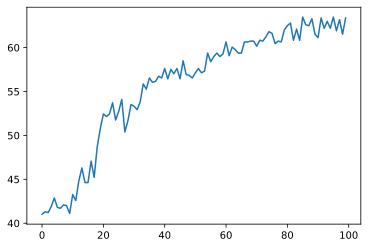

In [243]:
plt.plot(trainacc)

In [244]:
test_loader = DataLoader(test_set,batch_size=test_set.tensors[1].shape[0])

trainloss = np.zeros((epochs,5))
trainacc = np.zeros((epochs,5)) 
testacc = np.zeros((epochs,5)) 

for i , batchsize in enumerate(2**np.arange(1,10,2)):

  train_loader = DataLoader(train_set,batch_size=int(batchsize),drop_last=True,shuffle=True)
  trainacc[:,i], testacc[:,i], trainloss[:,i]  = trainANN()




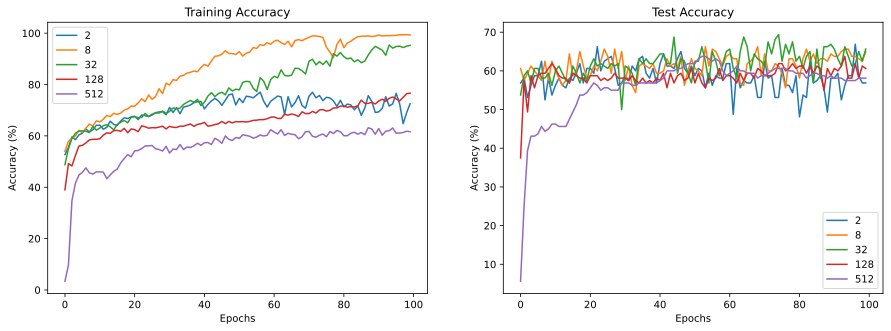

In [245]:

fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(trainacc)
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Training Accuracy')
ax[0].legend(2**np.arange(1,10,2))

ax[1].plot(testacc)
ax[1].set_title('Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(2**np.arange(1,10,2))
# ax[1].set_ylim([27,103])

plt.show()

In [246]:
testacc

array([[56.87500381, 60.625     , 53.75000381, 37.5       ,  5.625     ],
       [58.125     , 57.5       , 58.74999619, 57.5       , 25.        ],
       [53.125     , 59.375     , 60.00000381, 49.375     , 39.375     ],
       [56.25      , 61.25      , 56.87500381, 58.74999619, 43.125     ],
       [58.74999619, 60.00000381, 60.625     , 55.62499619, 43.125     ],
       [58.74999619, 58.74999619, 60.625     , 58.74999619, 43.75      ],
       [62.5       , 57.5       , 58.125     , 59.375     , 45.625     ],
       [52.49999619, 62.5       , 58.125     , 59.375     , 44.375     ],
       [58.125     , 57.5       , 59.375     , 60.625     , 45.        ],
       [53.75000381, 62.5       , 56.25      , 61.87499619, 46.25      ],
       [56.25      , 60.00000381, 60.00000381, 60.625     , 46.25      ],
       [58.125     , 58.125     , 61.25      , 58.74999619, 45.625     ],
       [56.25      , 56.25      , 59.375     , 58.125     , 45.625     ],
       [55.62499619, 57.5       , 57.5

In [247]:
trainacc[49,:]

array([72.04450626, 91.68994413, 78.19602273, 65.55397727, 59.375     ])